# WeatherPy
----

### By Rodrigo Guarneros

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [3]:
#let's know the dataframe 
df = pd.read_csv(output_data_file)

In [4]:
df.tail()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68
547,547,tongren,4,CN,1558378899,64,27.72,109.18,55.86,2.84


In [5]:
# seems to be missings
df.isna().sum()/len(df) 
df_nas = df[df['Country'].isna()]
df_nas
#however the missings are in Country cell, we have country and every colum is Ok
df_nas.columns

Index(['City_ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat',
       'Lng', 'Max Temp', 'Wind Speed'],
      dtype='object')

In [6]:
# Let's look for duplicated observations
df[["City","Country"]].duplicated().sum()

0

## Generate Cities List

In [7]:
#having in mind the angular distance between north pole and south pole, lets see the limits
df["Lat"].max() 
df["Lat"].min()
# As well as longitud Longitude is measured by imaginary lines that run around the Earth 
# vertically (up and down) and meet at the North and South Poles. 
df["Lng"].max() 
df["Lng"].min()


-173.23

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [9]:
cities

['bluff',
 'hilo',
 'ribeira grande',
 'rikitea',
 'jamestown',
 'inhambane',
 'kasempa',
 'vaini',
 'puerto ayora',
 'thompson',
 'sobolevo',
 'longyearbyen',
 'atuona',
 'kapaa',
 'cape town',
 'albany',
 'portland',
 'atocha',
 'port blair',
 'busselton',
 'qiongshan',
 'klaksvik',
 'pasighat',
 'praia da vitoria',
 'taolanaro',
 'homer',
 'carnarvon',
 'hamilton',
 'ushuaia',
 'nizhneyansk',
 'port elizabeth',
 'esperance',
 'yakima',
 'hermanus',
 'saskylakh',
 'saint-philippe',
 'nome',
 'dalby',
 'aguimes',
 'saint-pierre',
 'nhulunbuy',
 'kaitangata',
 'hobart',
 'bokaro',
 'port alfred',
 'barentsburg',
 'harper',
 'new norfolk',
 'mataura',
 'bredasdorp',
 'laguna',
 'illoqqortoormiut',
 'okhotsk',
 'iqaluit',
 'tezu',
 'vao',
 'male',
 'kruisfontein',
 'cozumel',
 'ahumada',
 'asfi',
 'issoire',
 'kawalu',
 'bengkulu',
 'attawapiskat',
 'jining',
 'luau',
 'sitka',
 'hanchuan',
 'arraial do cabo',
 'hithadhoo',
 'biak',
 'pangnirtung',
 'polunochnoye',
 'talnakh',
 'punta ar

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Before we need to see which variables are relevant based on the questions we need to answer:
# Latitude, Longitud, Temperature, Humidity, Cloudiness, Max Temp, Wind speed, Temp, City, Country
# Doumentation give us the path for every data in Json. https://openweathermap.org/current 
# let's prepare list to 
# df.columns
#'City_ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat',
#       'Lng', 'Max Temp', 'Wind Speed'
# based on a json request and the position in directory

country = [] # ["sys"]["country"]
city_list =[] # ["name"]
date = [] # ["dt"]
humidity = [] # ["main"]["humidity"]
cloudiness = [] # ["clouds"]["all"]
lon = [] # ["coord"]["lon"] 
lat = [] # ["coord"]["lot"]
temp = [] # ["main"]["temp"]
max_temp = [] # ["main"]["temp_max"]
wind_speed = [] # ["wind"]["speed"]


In [ ]:
response = requests.get(endpoint + cities[0]).json()
response["name"]

In [13]:
# Lets build the query our end point with the following url:
url = "http://api.openweathermap.org/data/2.5/weather?"
# The units could be: "standard", "metric" and "imperial" 
units = "metric" 
# Build query URL (End Point)
endpoint = f"{url}appid={api_key_weather}&units={units}&q="

# to restart the index
index_counter = 0
counter_set = 1

for index, city in enumerate(cities, start=1):
    
    try:
        response = requests.get(endpoint + city).json()
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_list.append(response["name"])
        
        if index_counter > 49:
            index_counter = 0 
            counter_set = counter_set + 1 
        
        else:
            index_counter = index_counter + 1 
        
        print(f"Getting data {index_counter} of set number {counter_set} : {city}") 
        
    except(KeyError, IndexError):
            print("Missing field/result... skipping.")

print(f"""
___________________________________________________________

                    WE FINISH! :)

-----------------------------------------------------------
     """)


Getting data 1 of set number 1 : bluff
Getting data 2 of set number 1 : hilo
Getting data 3 of set number 1 : ribeira grande
Getting data 4 of set number 1 : rikitea
Getting data 5 of set number 1 : jamestown
Getting data 6 of set number 1 : inhambane
Getting data 7 of set number 1 : kasempa
Getting data 8 of set number 1 : vaini
Getting data 9 of set number 1 : puerto ayora
Getting data 10 of set number 1 : thompson
Getting data 11 of set number 1 : sobolevo
Getting data 12 of set number 1 : longyearbyen
Getting data 13 of set number 1 : atuona
Getting data 14 of set number 1 : kapaa
Getting data 15 of set number 1 : cape town
Getting data 16 of set number 1 : albany
Getting data 17 of set number 1 : portland
Getting data 18 of set number 1 : atocha
Getting data 19 of set number 1 : port blair
Getting data 20 of set number 1 : busselton
Getting data 21 of set number 1 : qiongshan
Getting data 22 of set number 1 : klaksvik
Getting data 23 of set number 1 : pasighat
Getting data 24 of s

Getting data 25 of set number 4 : najran
Getting data 26 of set number 4 : kununurra
Getting data 27 of set number 4 : ahuimanu
Getting data 28 of set number 4 : khatanga
Getting data 29 of set number 4 : kenitra
Getting data 30 of set number 4 : butaritari
Getting data 31 of set number 4 : emilio carranza
Getting data 32 of set number 4 : pingliang
Getting data 33 of set number 4 : pevek
Getting data 34 of set number 4 : alta floresta
Getting data 35 of set number 4 : sile
Getting data 36 of set number 4 : quatre cocos
Missing field/result... skipping.
Getting data 37 of set number 4 : camacha
Getting data 38 of set number 4 : hato
Missing field/result... skipping.
Getting data 39 of set number 4 : geraldton
Getting data 40 of set number 4 : antigonish
Getting data 41 of set number 4 : bilma
Getting data 42 of set number 4 : murgab
Getting data 43 of set number 4 : pisco
Getting data 44 of set number 4 : bonavista
Getting data 45 of set number 4 : itarema
Missing field/result... skipp

Getting data 49 of set number 7 : jiangyou
Getting data 50 of set number 7 : chapais
Getting data 0 of set number 8 : fez
Getting data 1 of set number 8 : kieta
Getting data 2 of set number 8 : tessalit
Missing field/result... skipping.
Getting data 3 of set number 8 : rocha
Getting data 4 of set number 8 : amahai
Getting data 5 of set number 8 : fort nelson
Getting data 6 of set number 8 : balikpapan
Getting data 7 of set number 8 : leh
Getting data 8 of set number 8 : newala
Getting data 9 of set number 8 : natal
Getting data 10 of set number 8 : whitehorse
Getting data 11 of set number 8 : port lincoln
Getting data 12 of set number 8 : amuntai
Getting data 13 of set number 8 : toktogul
Getting data 14 of set number 8 : saint anthony
Getting data 15 of set number 8 : atbasar
Getting data 16 of set number 8 : filadelfia
Missing field/result... skipping.
Getting data 17 of set number 8 : xining
Getting data 18 of set number 8 : haines junction
Getting data 19 of set number 8 : clyde ri

Getting data 24 of set number 11 : muyezerskiy
Getting data 25 of set number 11 : kloulklubed
Getting data 26 of set number 11 : lafiagi
Getting data 27 of set number 11 : brae
Getting data 28 of set number 11 : bama
Getting data 29 of set number 11 : hilliard
Getting data 30 of set number 11 : honiara
Getting data 31 of set number 11 : kalengwa
Getting data 32 of set number 11 : kukmor
Getting data 33 of set number 11 : ulladulla

___________________________________________________________

                    WE FINISH! :)

-----------------------------------------------------------
     


In [15]:
# At first glance, we need the same dimention in every array
len(wind_speed)
len(max_temp)
len(date)
len(country)
len(city_list)
len(lat)
len(lon)
len(temp)
len(max_temp)
len(wind_speed)

899

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# lets make a data frame
cities_df = pd.DataFrame({ 
                "City" : city_list,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Lat" : lat,
                "Lon" : lon,
                "Tem" : temp,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

# saving as csv file
cities_df.to_csv("cities.csv",sep=",", index=False)
cities_df.shape # the perfect shape

(899, 10)

In [17]:
# Displaying the data frame
cities_df
#transform Date Unix in datetime with pandas
cities_df["Date"]=pd.to_datetime(cities_df["Date"], unit="s")
cities_df

,City,Country,Date,Humidity,Cloudiness,Lat,Lon,Tem,Max Temp,Wind Speed
0,Bluff,NZ,2020-10-26 22:04:03,75,64,-46.60,168.33,11.11,11.11,1.34
1,Hilo,US,2020-10-26 22:02:30,74,90,19.73,-155.09,23.55,27.00,2.60
2,Ribeira Grande,PT,2020-10-26 22:04:03,88,75,38.52,-28.70,21.00,21.00,8.20
3,Rikitea,PF,2020-10-26 22:04:03,85,100,-23.12,-134.97,23.87,23.87,8.65
4,Jamestown,US,2020-10-26 21:59:04,93,90,42.10,-79.24,7.08,7.78,4.10
...,...,...,...,...,...,...,...,...,...,...
894,Hilliard,US,2020-10-26 22:07:07,81,90,40.03,-83.16,8.91,9.44,3.10
895,Honiara,SB,2020-10-26 22:07:07,78,40,-9.43,159.95,28.00,28.00,1.50
896,Kalengwa,ZM,2020-10-26 22:07:07,32,23,-13.47,25.00,21.57,21.57,2.51
897,Kukmor,RU,2020-10-26 22:07:07,94,18,56.19,50.89,-2.16,-2.16,4.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

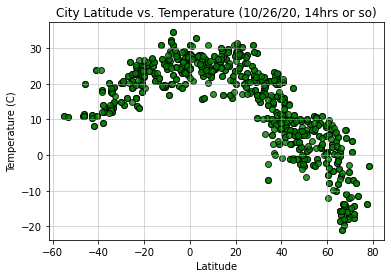

In [19]:
# I don't know if you want the linear relationship with max temp or temp only, so I did both

# Hipothesis: Shows a linear relationship between latitude and temperature 

plt.scatter(cities_df["Lat"], cities_df["Tem"], facecolor = "green", edgecolor = "black", alpha=0.8)

# Title
plt.title("City Latitude vs. Temperature (10/26/20, 14hrs or so)")

# X axis label
plt.xlabel("Latitude")

# Y axis label
plt.ylabel("Temperature (C)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../starter_code/Images/City Latitude vs Temperature.png")

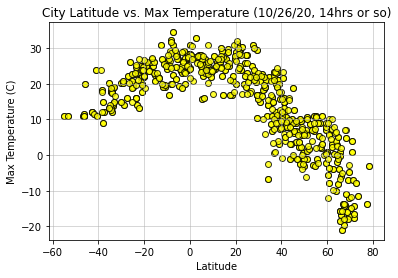

In [20]:
# Hipothesis: Shows a linear relationship between latitude and max temperature. With medium temperature or max temperature
# The more near from the Ecuator (lat = 0), the most heat.

plt.scatter(cities_df["Lat"], cities_df["Max Temp"], facecolor = "yellow", edgecolor = "black", alpha=0.8)

# Title
plt.title("City Latitude vs. Max Temperature (10/26/20, 14hrs or so)")

# X axis label
plt.xlabel("Latitude")

# Y axis label
plt.ylabel("Max Temperature (C)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../starter_code/Images/City Latitude vs Max Temperature.png")

#### Latitude vs. Humidity Plot

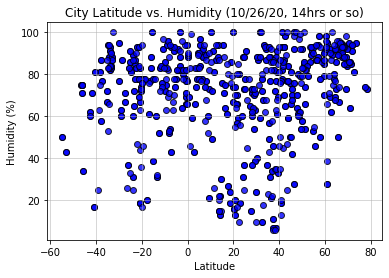

In [21]:

plt.scatter(cities_df["Lat"], cities_df["Humidity"], facecolor = "blue", edgecolor = "black", alpha=0.8)

# Title
plt.title("City Latitude vs. Humidity (10/26/20, 14hrs or so)")

# X axis label
plt.xlabel("Latitude")

# Y axis label
plt.ylabel("Humidity (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../starter_code/Images/City Latitude vs Humidity.png")

#### Latitude vs. Cloudiness Plot

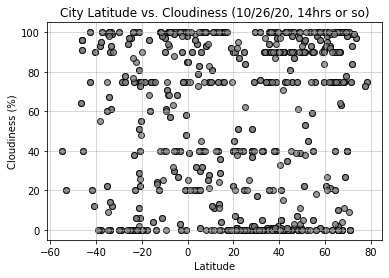

In [22]:
# Here also we can expect a linear relationship where Ecuator nearest points should have less clouds. However there is
# not a pattern at first glance

plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], facecolor = "gray", edgecolor = "black", alpha=0.8)

# Title
plt.title("City Latitude vs. Cloudiness (10/26/20, 14hrs or so)")

# X axis label
plt.xlabel("Latitude")

# Y axis label
plt.ylabel("Cloudiness (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../starter_code/Images/City Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

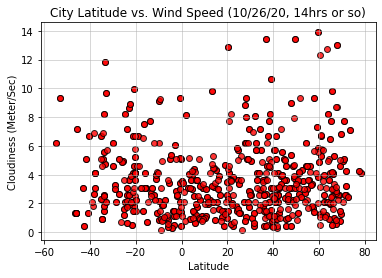

In [23]:
# Here also we can expect a linear relationship where Ecuator nearest points should have less wind speed. 

plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], facecolor = "red", edgecolor = "black", alpha=0.8)

# Title
plt.title("City Latitude vs. Wind Speed (10/26/20, 14hrs or so)")

# X axis label
plt.xlabel("Latitude")

# Y axis label
plt.ylabel("Cloudiness (Meter/Sec)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../starter_code/Images/City Latitude vs Wind Speed.png")

## Linear Regression

The r-squared is: 0.43966069660966905


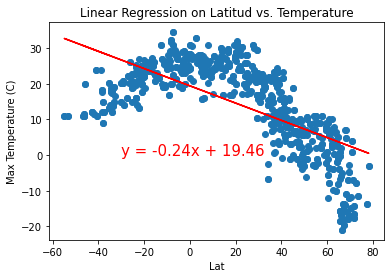

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
from sklearn import datasets

# Perform a linear regression on latitude vs temperature
x_values = cities_df["Lat"]
y_values = cities_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,0),fontsize=15,color="red")
plt.title("Linear Regression on Latitud vs. Temperature")
plt.xlabel("Lat")
plt.ylabel("Max Temperature (C)")
print(f"The r-squared is: {rvalue**2}")


plt.savefig("../starter_code/Images/Linear Regression1.png")


In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities_df.loc[cities_df["Lat"] >= 0]
southern = cities_df.loc[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7617062118770936


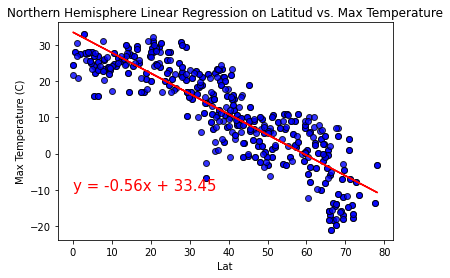

In [27]:
# getting a regression for NH
x_values = northern["Lat"]
y_values = northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "blue", edgecolor = "black", alpha=0.8 )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.title("Northern Hemisphere Linear Regression on Latitud vs. Max Temperature")
plt.xlabel("Lat")
plt.ylabel("Max Temperature (C)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../starter_code/Images/NH LATvsMaxtempReg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5695081765808024


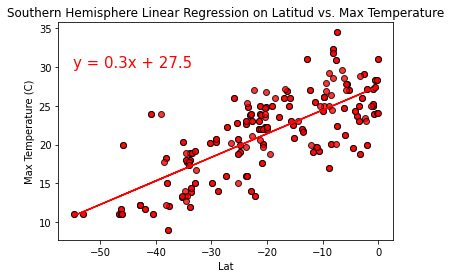

In [29]:
# getting a regression for NH
x_values = southern["Lat"]
y_values = southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "red", edgecolor = "black", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.title("Southern Hemisphere Linear Regression on Latitud vs. Max Temperature")
plt.xlabel("Lat")
plt.ylabel("Max Temperature (C)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../starter_code/Images/SH LATvsMaxtempReg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06770222007061921


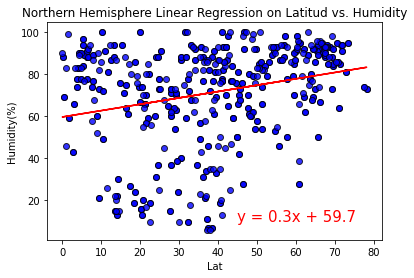

In [30]:
x_values = northern["Lat"]
y_values = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "blue", edgecolor = "black", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Linear Regression on Latitud vs. Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity(%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../starter_code/Images/NH LATvsHumidityReg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.024020300674383096


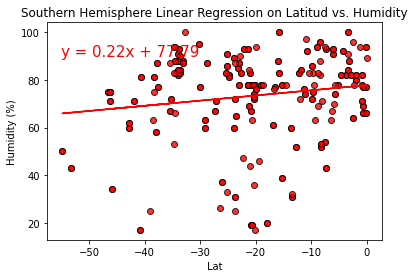

In [32]:
x_values = southern["Lat"]
y_values = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "red", edgecolor = "black", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.title("Southern Hemisphere Linear Regression on Latitud vs. Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../starter_code/Images/SH LATvsHumidityReg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02351011379138814


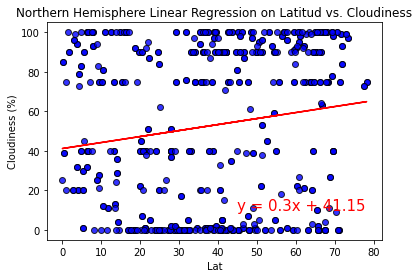

In [33]:
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "blue", edgecolor = "black", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Linear Regression on Latitud vs. Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../starter_code/Images/NH LATvsCloudReg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010131505452631825


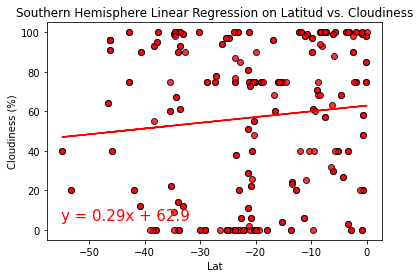

In [34]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "red", edgecolor = "black", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")
plt.title("Southern Hemisphere Linear Regression on Latitud vs. Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../starter_code/Images/SH LATvsCloudinessReg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02422408431272117


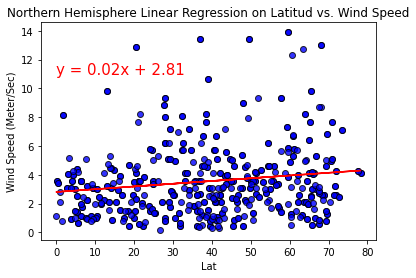

In [35]:
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "blue", edgecolor = "black", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,11),fontsize=15,color="red")
plt.title("Northern Hemisphere Linear Regression on Latitud vs. Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed (Meter/Sec)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../starter_code/Images/NH LATvsWindReg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03932313918941677


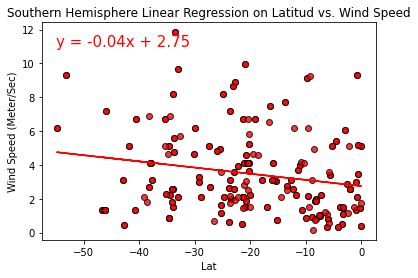

In [36]:
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "red", edgecolor = "black", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.title("Southern Hemisphere Linear Regression on Latitud vs. Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed (Meter/Sec)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../starter_code/Images/SH LATvsWindReg.png")